In [1]:
from __future__ import division
import numpy as np
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

/Users/kamranbinaee/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## Lets define two lines with their unit vector and a point on each of them
### I purposefully defined these points as right/left eye centers being $IOD/2$ separate from each other
### The two lines represent two gaze vectors that do not intersect in 3D (Skew Line)

In [2]:
p0 = np.array([0.0, -.2, 0.0], dtype = float)
u0 = np.array([1.0, 0.2, 0.0], dtype = float)

p1 = np.array([0.0, 0.2, 0.0], dtype = float)
u1 = np.array([1.0, -0.2, 0.2], dtype = float)


## For finding the minimum distance between two skew lines $u_0 \& u_1$ in 3D we need to find the line which is prependicular to both of them defined by $\vec{RS}$
### The position of these two points will be calculated by these two linear equations
$1) \vec{RS}.u_0 = 0$

$2) \vec{RS}.u_1 = 0$

In [3]:
a11 = np.dot(u0,u0.T)
a12 = -np.dot(u1,u0.T)
a21 = np.dot(u0,u1.T)
a22 = -np.dot(u1,u1.T)

b1 = np.dot(p1-p0,u0)
b2 = np.dot(p1-p0,u1)

A = np.array([[a11, a12],[a21, a22]], dtype = float)
B = np.array([b1, b2], dtype = float)
x = np.linalg.solve(A,B)
print 'The line variable that satisfies the equation is:\n t =', x

The line variable that satisfies the equation is:
 t = [ 0.80952381  0.79365079]


In [4]:
R = p0 + np.dot(u0, x[0])
S = p1 + np.dot(u1, x[1])
print 'R = ', R, '\nS = ', S

R =  [ 0.80952381 -0.03809524  0.        ] 
S =  [ 0.79365079  0.04126984  0.15873016]


<IPython.core.display.Javascript object>


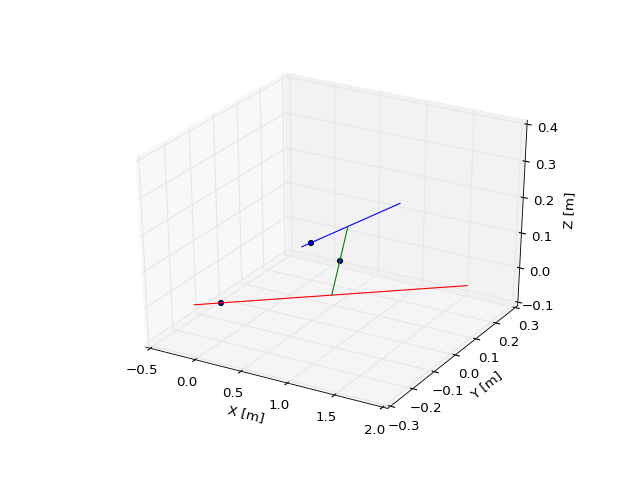

/Users/kamranbinaee/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
q = 1
v = -1

ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')

ax.scatter(p0[0], p0[1], p0[2], 'p&')
ax.scatter(p1[0], p1[1], p1[2], 'p&')
ax.scatter((S[0]+R[0])/2, (S[1]+R[1])/2, (S[2]+R[2])/2, 'p&')

ax.plot([R[0] - q*u0[0], R[0] + q*u0[0]],[R[1] - q*u0[1], R[1] + q*u0[1]], [R[2] - q*u0[2], R[2] + q*u0[2]], 'r')
ax.plot([S[0] - v*u1[0], S[0] + v*u1[0]],[S[1] - v*u1[1], S[1] + v*u1[1]], [S[2] - v*u1[2], S[2] + v*u1[2]], 'b')
ax.plot([R[0], S[0]],[R[1], S[1]], [R[2], S[2]], 'g')
plt.show()

# By Calculating the shortest line (Green) between two 3D skew lines, the average point could be considered as the 3D gaze point/vector for many binocular eye tracking applications